# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
import graphviz

In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


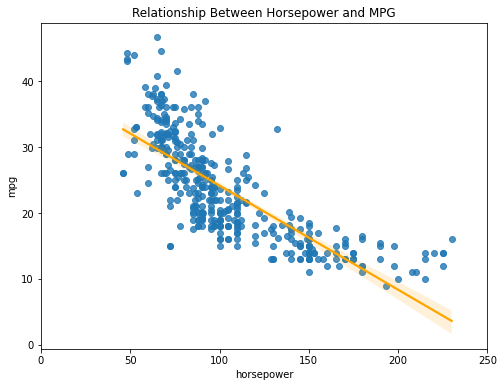

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
# call_on_students(1)

#### Answer: 

- When the slope is horizontal we will get the lowest RSS value

- RSS measures levels of variance between regression line and data points

It's plotting out the RSS per slop of the linear regression line based off the cost function.  Where the tangent is 0 on this graph, the RSS is the best.

### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
# call_on_students(1)

#### Answer: 

- 

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
# call_on_students(1)

#### Answer: 

- Since we cannot calculate all the slopes for gradient descent all of the time we calculate the RSS values at
  different increments, we call this step size.

- The learning rate helps to avoid overshooting the minimum and aides in moving m in the appropriate direction.

- step size = learning rate x gradient


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
# call_on_students(1)

#### Answer: 

1) binary classification
2) probablities
3) 
4) it's parametric because it fits weights (coefficients)


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
# call_on_students(1)

#### Answer: 

log reg vs KNN?

1) simple, very easy to compute compared to other models (such as KNN, which is much slower). Not prone to overfitting (KNN and Decision trees overfit)

2) KNN can model complex boundaries pretty easily (cost of being prone to overfitting)


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
# call_on_students(1)

In [14]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop('target',axis = 1)
y = mpg_class['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.33, random_state = 42)

In [15]:
# Scale the data
scale = StandardScaler()
X_train_scaled =scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
y_train.unique()
y_train.value_counts()

0    196
1     66
Name: target, dtype: int64

#### Answer:

- binary values.  Leans heavily on the 0 values


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- randomly guess 1 or 0 and base the weights based on the test value counts distribution


### Dummy classifier 

In [18]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train_scaled,y_train)

/Users/jalilsarwari/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier()

#### Part 3: How accurate would that baseline be on test data?


In [19]:
# Code to find the answer
dummy_clf.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

#### Answer:

- not very accurate at all


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [20]:
# call_on_students(1)

#### Answer:

- You can use features lol


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [21]:
# call_on_students(1)

In [22]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

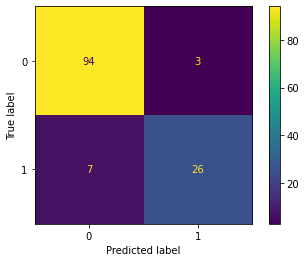

In [23]:
# Plot a confusion matrix on the test data
y_pred = logreg.predict(X_test_scaled)
plot_confusion_matrix(logreg,X_test_scaled,y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [24]:
# call_on_students(1)

In [25]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9230769230769231

In [26]:
# Precision
precision_score(y_test,y_pred)

0.896551724137931

In [27]:
# Recall
recall_score(y_test,y_pred)

0.7878787878787878

In [28]:
# F1-Score
f1_score(y_test,y_pred)

0.8387096774193549

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [29]:
# call_on_students(1)

In [30]:
y_hat = logreg.predict_proba(X_test_scaled)[:,1]

In [31]:
# Calculate roc-auc
roc_auc = roc_auc_score(y_test,y_hat)

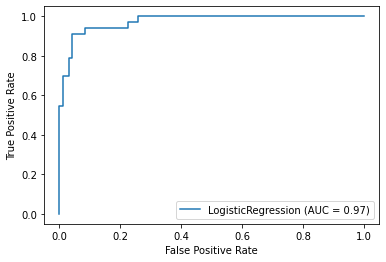

In [32]:
# Plot the ROC curve
plot_roc_curve(logreg,X_test_scaled,y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [33]:
# call_on_students(1)

#### Answer:

- 


## Part 4: Decision Trees

### Set Up

NOTE! This code might not work for you! The images these generate are already prepopulated below because of that.

In [34]:
# Helper function from a colleague (h/t Bryan)
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [35]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [36]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, ['weight'])

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [37]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, ['origin'])

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

#### Images:

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [38]:
# call_on_students(1)

#### Answer:

- The first one, based on the value numbers the first one has more heavily weighted opposing values
  because you're minimizing impurities


In [48]:
parent_impurity = 0.381
weight1 = 196/262
weight2 = 66/262
# impurity = E weights * Genie
weighted_impurity = weight1 * 0.088 + (weight2 * 0.213)
weighted_impurity

0.1194885496183206

In [49]:
# take original genie and subtract it from weighted impurity
parent_impurity - weighted_impurity

0.2615114503816794

In [50]:
parent_impurity = 0.381
weight1 = 170/262
weight2 = 92/262
# impurity = E weights * Genie
weighted_impurity = weight1 * 0.475 + (weight2 * 0.022)
parent_impurity - weighted_impurity

0.06506870229007639

# The first one is greater than the second one!

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [39]:
# call_on_students(1)

In [56]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

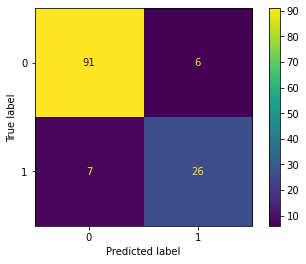

In [57]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt,X_test,y_test)

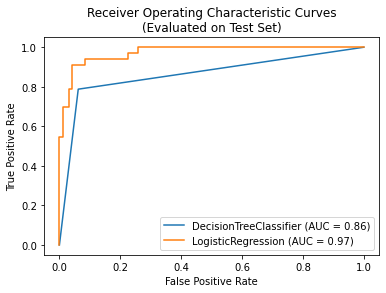

In [59]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- by taking a look at the legend value
